In [ ]:
%%capture
%run preprocessing.ipynb

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Create an SVM object
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

In [3]:
measures =[]
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

measures.append({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

# Print results in a table
measures_df = pd.DataFrame(measures)
print(measures_df)

   accuracy  precision   recall        f1
0   0.96502   0.965119  0.96502  0.964941


<Axes: >

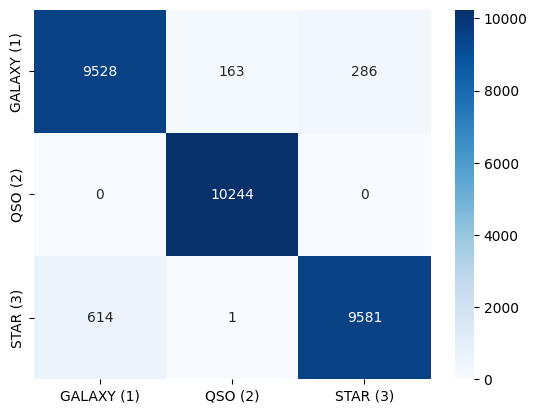

In [4]:
import seaborn as sns

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)